# EXPLORATORY ANALYSIS BASED ON QNPy model results

In order to understand obtained data, we will analyze it further by visual exploration

In [240]:
import os

# checking if folders for future exploration exist 

folders_needed = ['./stimulus_results/']

for folder in folders_needed:
    if not os.path.exists(folder):
        os.makedirs(folder)
    else: 
        print (f'- Folder - {folder} - already exists')

# finding path for each prediction csv file 

filepath_train = './output/predictions/train/data/'  # for example: './my_data/'
filepath_test = './output/predictions/test/data/'  # for example: './my_data/'
filepath_val = './output/predictions/val/data/'  # for example: './my_data/'


train_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_train)))
test_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_test)))
val_list = list(filter(lambda x: '.csv' in x, os.listdir(filepath_val)))

train_files = []
test_files = []
val_files = []

for i in train_list:
    train_files.append(filepath_train + i)

for i in test_list:
    test_files.append(filepath_test + i)
    
for i in val_list:
    val_files.append(filepath_val + i)

    
# filepaths for all prediction .csv files 
all_files = train_files + test_files + val_files 
# all_files

In [241]:
# defining scales and subject names
scale_names= ['lepo', 'prijatno', 'privlacno', 'skladno']
subject_nr = [17, 8, 10, 15, 14, 9, 11, 81, 16, 18, 161, 3, 171, 181]

In [242]:
# function for finding data for one subject
def find_subject (sub_nr, file):    
    subject_data=[]
    for s in file:
        if s.find(f'o{sub_nr}_')>= 1:
            subject_data.append(s)
    return subject_data
# function for finding order of apperance of the separate scales 
def find_order (scale_data):
    order_data=[]
    for o in scale_data:
        if o.find('lepo')>= 1:
            order_data.append('lepo')
        elif o.find('prijatno')>= 1:
            order_data.append('prijatno')
        elif o.find('privlacno')>= 1:
            order_data.append('privlacno')
        elif o.find('skladno')>= 1:
            order_data.append('skladno')
    return order_data

In [244]:
import pandas as pd
import collections 

def find_subject_plot (number):
    subject = find_subject(number, all_files)
    order = find_order(subject)
    df_list = (pd.read_csv(file) for file in subject)
    data = pd.concat(df_list, axis=1)
    data.set_axis(['time', order[0], f'{order[0]}_err',
               'mjd2', order[1], f'{order[1]}_err', 
               'mjd3', order[2], f'{order[2]}_err', 
               'mjd4', order[3], f'{order[3]}_err'], axis='columns', inplace=True)
    data.drop(['mjd2', 'mjd3', 'mjd4'], axis=1)
    
#     plot data for that group
    plt.rcParams["figure.figsize"] = [7.00, 3.50] 
    plt.rcParams["figure.autolayout"] = True
    
    plt.subplots()
    plt.plot(data['time'], data['lepo'], linestyle='-', linewidth=1.3, color='b', label='lepo')
    plt.plot(data['time'], data['privlacno'], linestyle='-', linewidth=1.3, color='r', label='privlacno')
    plt.plot(data['time'], data['skladno'], linestyle='-', linewidth=1.3, color='g', label = 'skladno')
    plt.plot(data['time'], data['prijatno'], linestyle='-', linewidth=1.3, color='y', label = 'prijatno')


    plt.fill_between(
            data['time'],
            data['lepo'] - data['lepo_err'],
            data['lepo'] + data['lepo_err'],
            alpha=0.1,
            facecolor='b',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['privlacno'] - data['privlacno_err'],
            data['privlacno'] + data['privlacno_err'],
            alpha=0.1,
            facecolor='r',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['skladno'] - data['skladno_err'],
            data['skladno'] + data['skladno_err'],
            alpha=0.2,
            facecolor='g',
            interpolate=True)

    plt.fill_between(
            data['time'],
            data['prijatno'] - data['prijatno_err'],
            data['prijatno'] + data['prijatno_err'],
            alpha=0.3,
            facecolor='y',
            interpolate=True)

    plt.legend()
    plt.xlabel('time')
    plt.ylabel ('rt')

    plt.yticks([-2, 0, 2], fontsize=16)
    plt.xticks([-2, 0, 2], fontsize=16)
    plt.ylim([-2, 2])
    plt.grid('off')
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.title(f'Subject {number}')
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50] 
    plt.rcParams["figure.autolayout"] = True
    
    plt.savefig(f'./subject_results/Subject{number}.jpg')
    plt.show()

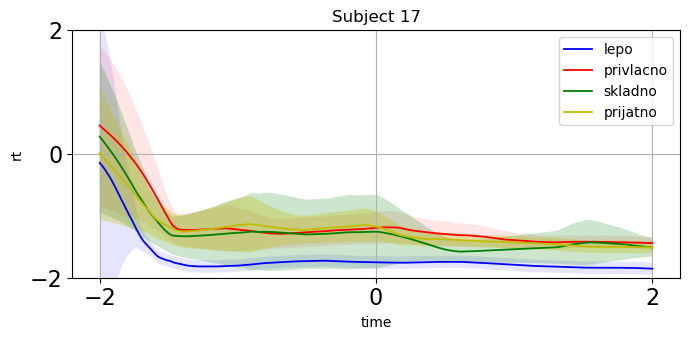

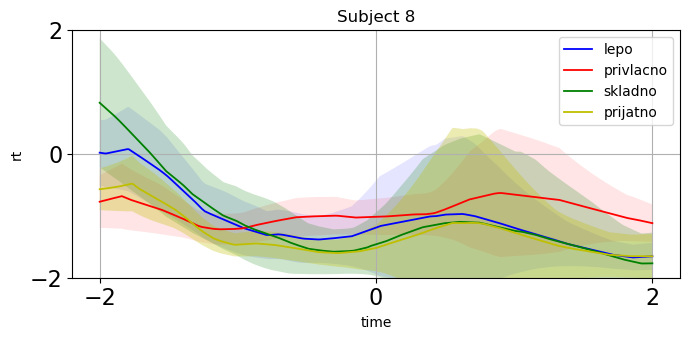

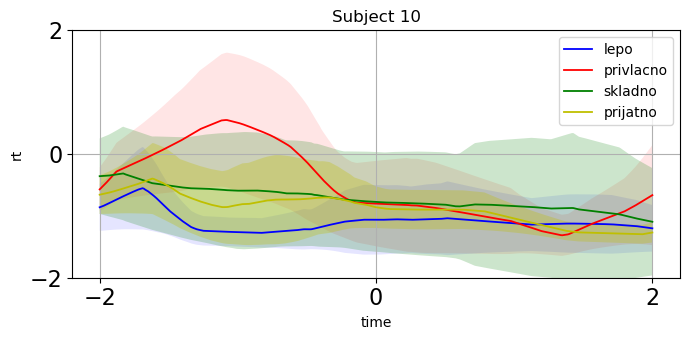

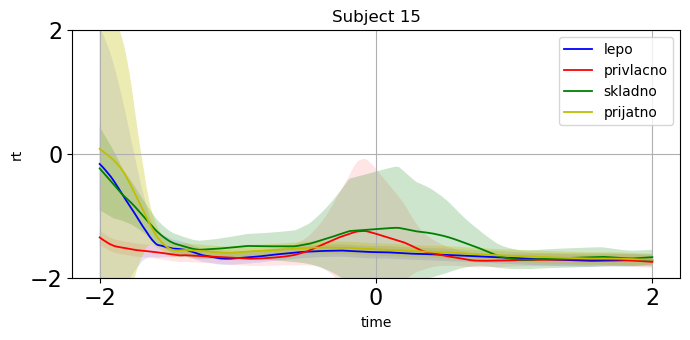

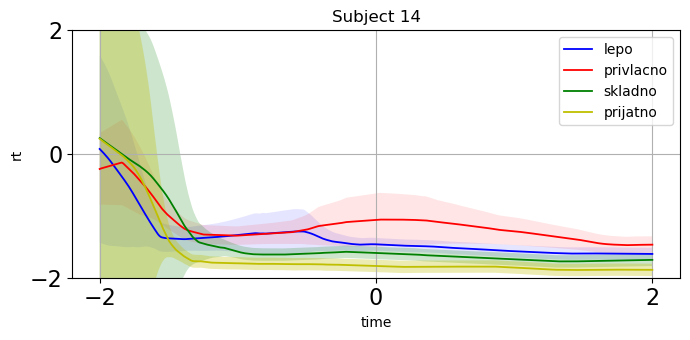

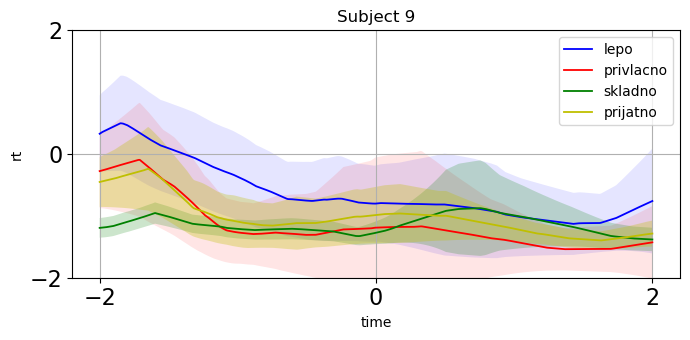

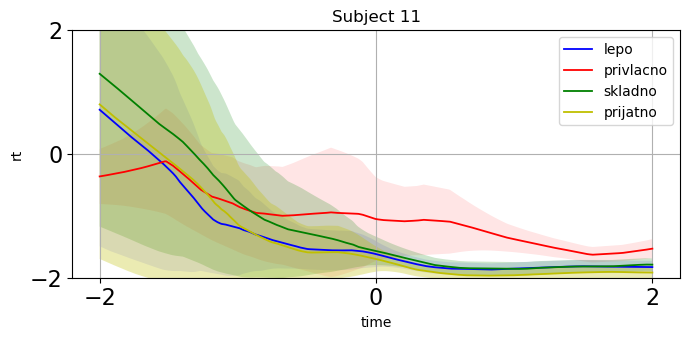

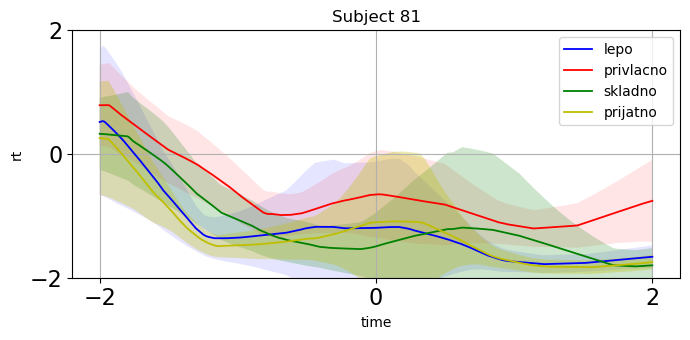

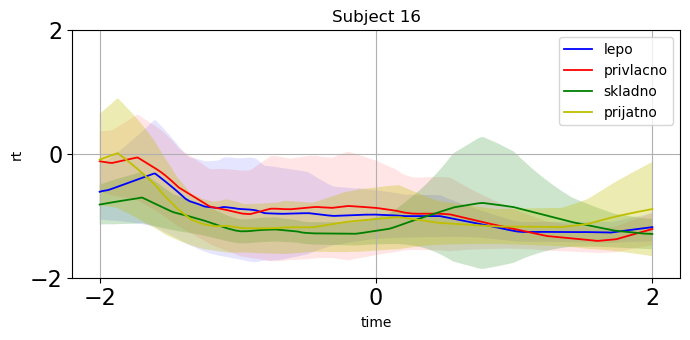

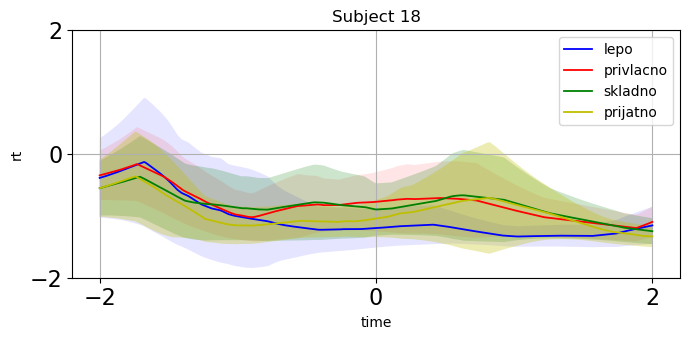

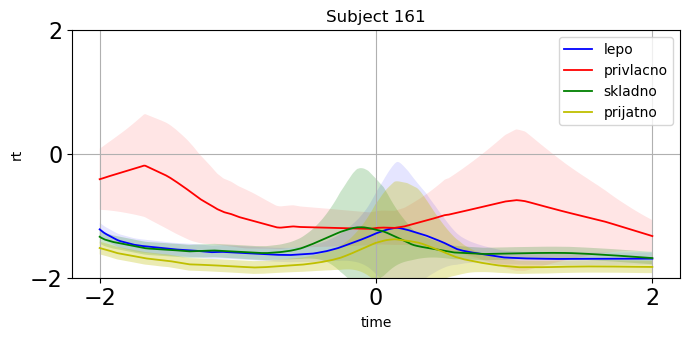

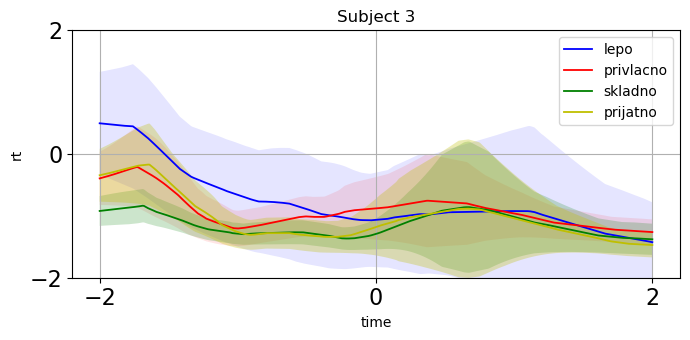

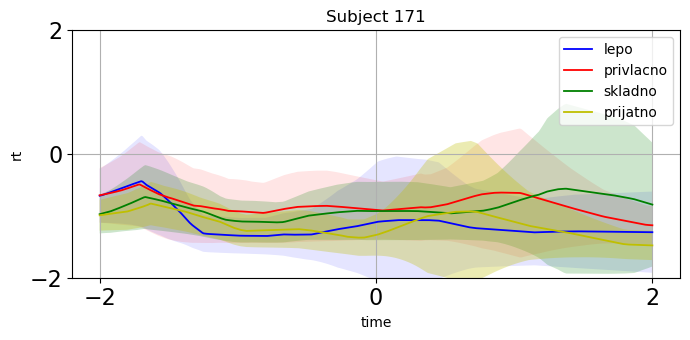

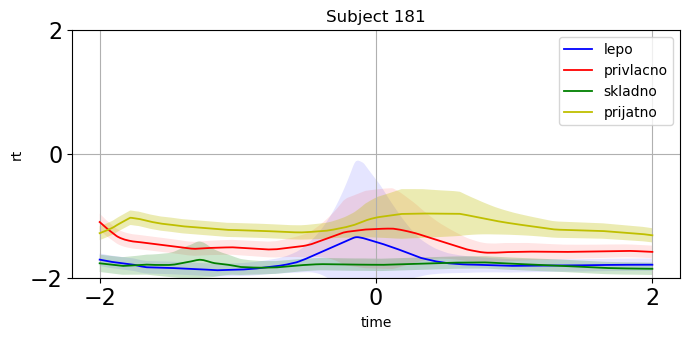

In [246]:
for a in subject_nr:
    find_subject_plot(a) 

results was very interesting: it can be said that each participant have specific ‘signature’ of responding during the experiment
   * since we are not measuring some personality and style data, we can just guess: 
       * different subject may have different focus and inhibition abilities? 
       * some are easily distracted? 
       * some can even be anxious (subject 11)? 
       * there are no data about enviromental factors, it could influence rt heavily
   * Results gathered for individuals was interesting, but not so informative regarding the main subject of the study:
       * framing effect and influence of the factor gender and sex 
       * (there are phenomena in psychology called own-race bias and own-gender bias)